# ADAMS PROJECT 2020
Osman Uğur Çelik 609211

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import re

import time

import pickle

from bs4 import BeautifulSoup

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import *
import re
import string

from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import keras
from keras.utils import to_categorical
from keras.models import Sequential, Model
from keras.layers import Dense, Embedding, LSTM,GRU, Dropout, Input, Bidirectional
from keras.layers.embeddings import Embedding
from keras.layers import Conv1D, GlobalMaxPool1D, concatenate
from keras.initializers import Constant
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import EarlyStopping, ModelCheckpoint

import statsmodels
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import DictVectorizer
!pip install gensim
import gensim
from gensim.models import Word2Vec

from scipy.special import inv_boxcox, boxcox
from scipy.stats import pearsonr
from scipy.sparse import coo_matrix, hstack


import seaborn as sns
import seaborn as sns; sns.set() 
%matplotlib inline
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 500)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\osman\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\osman\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\osman\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\osman\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


I will do the necessary steps to get Test and Train data.

In [2]:

import os
print(os.getcwd())

C:\Users\osman\Desktop\music\tracks\geburtstag


In [3]:
os.chdir('C:/Users/osman\Desktop/adams-master/data')

In [370]:
traindata = pd.read_csv("Train.csv")
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279577 entries, 0 to 279576
Data columns (total 50 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   audioVersionDurationSec      279577 non-null  int64  
 1   codeBlock                    25179 non-null   object 
 2   codeBlockCount               279577 non-null  float64
 3   collectionId                 137878 non-null  object 
 4   createdDate                  279577 non-null  object 
 5   createdDatetime              279577 non-null  object 
 6   firstPublishedDate           279577 non-null  object 
 7   firstPublishedDatetime       279577 non-null  object 
 8   imageCount                   279577 non-null  int64  
 9   isSubscriptionLocked         279577 non-null  bool   
 10  language                     279577 non-null  object 
 11  latestPublishedDate          279577 non-null  object 
 12  latestPublishedDatetime      279577 non-null  object 
 13 

In [366]:
traindata.columns.values


array(['audioVersionDurationSec', 'codeBlock', 'codeBlockCount',
       'collectionId', 'createdDate', 'createdDatetime',
       'firstPublishedDate', 'firstPublishedDatetime', 'imageCount',
       'isSubscriptionLocked', 'language', 'latestPublishedDate',
       'latestPublishedDatetime', 'linksCount', 'postId', 'readingTime',
       'recommends', 'responsesCreatedCount', 'socialRecommendsCount',
       'subTitle', 'tagsCount', 'text', 'title', 'totalClapCount',
       'uniqueSlug', 'updatedDate', 'updatedDatetime', 'url', 'vote',
       'wordCount', 'publicationdescription', 'publicationdomain',
       'publicationfacebookPageName', 'publicationfollowerCount',
       'publicationname', 'publicationpublicEmail', 'publicationslug',
       'publicationtags', 'publicationtwitterUsername', 'tag_name',
       'slug', 'name', 'postCount', 'author', 'bio', 'userId', 'userName',
       'usersFollowedByCount', 'usersFollowedCount', 'scrappedDate'],
      dtype=object)

There are too many columns I should drop most of them by looking at the most frequent values
To choose the right columns to drop first I should look at the column names in test data

In [187]:
testdata = pd.read_csv("Test.csv")
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          514 non-null    int64 
 1   index               514 non-null    int64 
 2   Author              514 non-null    object
 3   PublicationDetails  514 non-null    object
 4   Responses           432 non-null    object
 5   Header              506 non-null    object
 6   Text                514 non-null    object
 7   Length              514 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 32.2+ KB


In [188]:
testdata.columns.values
testdata.head()

,Unnamed: 0,index,Author,PublicationDetails,Responses,Header,Text,Length
0,0,0,Daniel Jeffries,"Daniel Jeffries in HackerNoon.comJul 31, 2017",627 responses,Why Everyone Missed the Most Mind-Blowing Feat...,There’s one incredible feature of cryptocurren...,23401
1,1,1,Noam Levenson,"Noam Levenson in HackerNoon.comDec 6, 2017",156 responses,NEO versus Ethereum: Why NEO might be 2018’s s...,"<img class=""progressiveMedia-noscript js-progr...",23972
2,2,2,Daniel Jeffries,"Daniel Jeffries in HackerNoon.comJul 21, 2017",176 responses,The Cryptocurrency Trading Bible,So you want to trade cryptocurrency?You’ve see...,402
3,3,5,Haseeb Qureshi,"Haseeb Qureshi in HackerNoon.comFeb 19, 2018",72 responses,Stablecoins: designing a price-stable cryptocu...,A useful currency should be a medium of exchan...,19730
4,4,7,William Belk,"William Belk in HackerNoon.comJan 28, 2018",19 responses,Chaos vs. Order — The Cryptocurrency Dilemma,Crypto crypto crypto crypto. It’s here. It’s h...,5324


In [206]:
testdata = testdata.rename(columns={'Header': 'title'})
testdata = testdata.rename(columns={'Length': 'wordCount'})
testdata = testdata.rename(columns={'Author': 'author'})

I start by looking at the language

We see most of the articles are in English so we drop other languages and do our analysis using only english articles.

## Descriptive Analytics

(array([39988.,  4200.,  4582.,  2617.,  1606.,  3334.,  2055.,  1356.,
          937.]),
 array([  0,  20,  40,  60,  80, 100, 150, 200, 250, 300]),
 <a list of 9 Patch objects>)

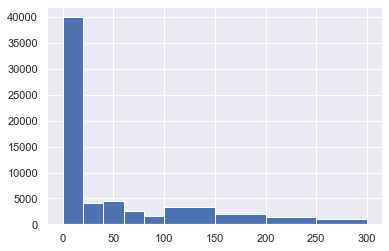

In [55]:
plt.hist(traindata['totalClapCount'], bins=[0, 20, 40, 60, 80, 100, 150, 200, 250, 300])

I start by looking at the language, in which the articles are written. As it is impossible to make my model read every language.

In [229]:
traindata['totalClapCount'].describe()

count     66329.000000
mean        173.268118
std        1892.611175
min           0.000000
25%           0.000000
50%           6.000000
75%          65.000000
max      291706.000000
Name: totalClapCount, dtype: float64

In [230]:
print(traindata[traindata['totalClapCount'] == 0].count()['totalClapCount'])

20808


As you can see most of the articles have a clap count between 0 and 20. We see diminishing number of articles as clap number goes up. I am also interested in the correlation between word count and clap count, since I have a length column in test data, it might be useful and applicable in the future.

In [266]:
title_desc = traindata['title']
a = [0]
for x in title_desc:
    i=0
    xinstring = str(x)
    a.append(len(xinstring.split()))
r = np.array(a)
np.mean(r)

7.810688979345696

(array([  409.,  5070., 12431., 15795., 13727.,  9197.,  5509.,  2781.,
         1290.]),
 array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18]),
 <a list of 9 Patch objects>)

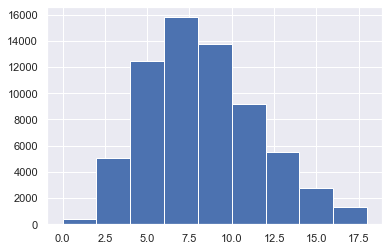

In [269]:
plt.hist(r, bins=[0, 2, 4, 6, 8, 10, 12, 14, 16, 18])

In [367]:
traindata['language'].value_counts().head(15)

en         257655
es           3714
pt           3518
zh-Hant      2703
fr           2035
tr           1558
ru           1220
th           1217
ja           1035
it            851
id            750
ko            672
de            404
un            344
zh            338
Name: language, dtype: int64

As you can see vast majority of the articles are in English, to the point that entries in different languages are negligible. Therefore I will drop the other values. Also like I said before I would need to create a new dictionary for every different language I don't exclude. Adding a second language means double the size of  dictionary and half the speed for my models to compute. [1]

In [371]:
traindata['totalClapCount'].describe()

count    279577.000000
mean        184.963473
std        1985.353004
min           0.000000
25%           0.000000
50%           8.000000
75%          72.000000
max      291706.000000
Name: totalClapCount, dtype: float64

In [372]:
traindata = traindata[traindata['language']=="en"]

In [373]:
traindata.shape


(257655, 50)

As I explained above there are too many unnecessary columns in train data so I will drop them until we only have the necessary columns we need. We only have: Author,	PublicationDetails,	Responses,	Header,	Text,	and length columns in test data. Besides these 5 every other column in train won't help me make a prediction (since my trained model won't be able to make predictions based on them) and therefore useless. Also I need to remove the duplicates from our data frame.

In [374]:
traindata = traindata.drop(['tag_name', 'slug', 'name', 'postCount','audioVersionDurationSec', 'codeBlock', 'codeBlockCount',
       'collectionId', 'createdDate', 'createdDatetime',
       'firstPublishedDatetime', 'imageCount',
       'isSubscriptionLocked', 'language', 'latestPublishedDate',
       'latestPublishedDatetime', 'linksCount', 'postId', 'readingTime',
       'recommends', 'responsesCreatedCount', 'socialRecommendsCount',
       'subTitle', 'tagsCount', 
       'uniqueSlug', 'updatedDate', 'updatedDatetime', 'url', 'vote',
       'wordCount', 'publicationdescription', 'publicationdomain',
       'publicationfacebookPageName', 'publicationfollowerCount',
       'publicationname', 'publicationpublicEmail', 'publicationslug',
       'publicationtags', 'publicationtwitterUsername', 'tag_name',
       'slug', 'name', 'postCount',  'bio', 'userId', 'userName',
       'usersFollowedByCount', 'usersFollowedCount', 'scrappedDate'], axis=1)
traindata = traindata.drop_duplicates()
traindata.shape


(66329, 5)

In [228]:
traindata.head()

,firstPublishedDate,text,title,totalClapCount,author
0,2018-09-18,"Private Business, Government and Blockchain\n\...","Private Business, Government and Blockchain",100,Anar Babaev
3,2018-01-07,EPQ draft 1 (4844 words)\nhttps://upload.wikim...,EPQ draft 1 (4844 words),0,George Sykes
7,2018-03-08,"Ascent of data Science, SAS and Big data Analy...","Ascent of data Science, SAS and Big data Analy...",0,tech data
11,2018-04-16,Can a robot love us better than another human ...,Can a robot love us better than another human ...,50,Stewart Alsop
16,2017-10-22,"2017 Big Data, AI and IOT Use Cases\nAn Active...","2017 Big Data, AI and IOT Use Cases",27,Melody Ucros


I will clean the text and title (I might use title in the future because it's almost as important as text)

In [ ]:
traindata_clean.head(10)

First I was thinking about lemmatizing but after deciding on using Word2Vec, I have noticed keeping the number of entries in our data that I feed into gensim model small reduces execution times. Using lemmatization we get 3 versions (adjective, verb, noun) for 1 root.[2] These 3 different type of words most of the time have similar effects on the interpration of a sentence. Using stemmization instead gives us a 1 abbreviated version of these different type of words, which can be thought as the root of these different words.

In [ ]:
#def get_wordnet_pos(word):

 #   tag = nltk.pos_tag([word])[0][1][0].upper()
 #   tag_dict = {"J": wordnet.ADJ,
 #               "N": wordnet.NOUN,
 #               "V": wordnet.VERB,
 #               "R": wordnet.ADV}

#    return tag_dict.get(tag, wordnet.NOUN)

Next I define 3 functions for cleaning text, title and author columns seperately.

They don't look totally the same because word size and diversity are different.

In [7]:
def clean_text(text):

   # lemmatizer = WordNetLemmatizer()

   ## Remove punctuation
    #text = text.translate(string.punctuation) 

 
    text = re.sub(r"[^A-Za-z0-9]", " ", text)
    text = re.sub(r" vc ", "venture capital", text)
    text = re.sub(r" VC ", "venture capital", text)
    text = re.sub(r" lr ", "linear regression", text)
    text = re.sub(r" dl ", "deep learning", text)
    text = re.sub(r" it ", "information technology", text)
    text = re.sub(r" nlp ", "natural language processing", text) 
    text = re.sub(r'(\d+)([a-zA-Z])', '\g<1> \g<2>', text)
    text = re.sub(r'(\d+) (th|st|nd|rd) ', '\g<1>\g<2> ', text)
    text = re.sub(r'(\d+),(\d+)', '\g<1>\g<2>', text)
    text = re.sub(r'(\d+)(e)(\d+)','\g<1> \g<3>', text)
    text = re.sub(r" img ", " image ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r" e mail", "email", text)
    text = re.sub(r"\s{2,}", " ", text)
    text = re.sub(r" usa ", " america ", text)
    text = re.sub(r" u s ", " america ", text)
    text = re.sub(r"the us", "america", text)
    text = re.sub(r" uk ", " england ", text)
    text = re.sub(r" dms ", "direct messages ", text)  
    text = re.sub(r"\0rs ", " rs ", text) 
    text = re.sub(r"ios", "apple operating system", text)
    text = re.sub(r"programing", "programming", text)
    text = re.sub(r'[\x00-\x1f\x7f-\x9f\xad]', '', text)
    text = re.sub(r'(\d+)(e)(\d+)',r'\g<1> \g<3>', text)
    text = re.sub(r"(-+|\.+)\s?", "  ", text)
    text = re.sub(r'ᴵ+', '', text) 
    text = re.sub(r" ai ", "artificial intelligence", text)
    text = re.sub(r" nn ", "neural networks", text)
    text = re.sub(r" rnn ", "recurrent neural networks", text)
    text = re.sub(r" ml ", "machine learning", text)
    text = re.sub(r"start up", "startup", text)
    text = re.sub(r"inteligencia artificial", "artificial intelligence", text)
    text = re.sub(r"intelligence artificielle", "artificial intelligence", text)    
    text = re.sub(r" vr ", "virtual reality", text)
    text = re.sub(r" tech ", " technology ", text)
    text = text.split()
    text = [w for w in text if len(w) >= 2]
    text = " ".join(text)
    

   ## Convert words to lower case and split them
    text = text.lower().split()
    
    ## Remove stop words
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops and len(w) >= 2]
    
    text = " ".join(text)
            
    text = text.split()
    stemmer = SnowballStemmer('english')
    stemmed_words = [stemmer.stem(word) for word in text]
    text = " ".join(stemmed_words)
    
    return(text) 

In [ ]:
traindata['text']= traindata['text'].astype(str)
traindata_clean= traindata['text'].map(lambda x: clean_text(x))

I will use texts only to build a dictionary, because I've noticed model results I get using only titles of articles is good enough (almost as good as using text data) and my models work twice as fast. Besides practical benefits, I believe title is a good predictor of the attention an article attracts.  I cleaned and used text column for gensim model because having a larger chunk of text to train the gensim model ensures a more reliable dictionary[3], (since text column has much more words, sentences and phrases) although makes training the model slower. It took my processor around 2 hours to give an output to gensim model. Therefore, I used pickle to save this model locally in my laptop.[4]

In [8]:
def clean_title(text):



    
    text = re.sub(r'[^A-Za-z0-9]+', ' ', text)
    
    text = re.sub(r" e mail", "email", text)
    text = re.sub(r"\s{2,}", " ", text)
    text = re.sub(r" usa ", " america ", text)
    text = re.sub(r" u s ", " america ", text)
    text = re.sub(r"the us", "america", text)
    text = re.sub(r" uk ", " england ", text)
    text = re.sub(r" dms ", "direct messages ", text)  
    text = re.sub(r"\0rs ", " rs ", text) 
    text = re.sub(r"ios", "apple operating system", text)
    text = re.sub(r"programing", "programming", text)
    text = re.sub(r" ai ", "artificial intelligence", text)
    text = re.sub(r" nn ", "neural networks", text)
    text = re.sub(r" rnn ", "recurrent neural networks", text)
    text = re.sub(r" ml ", "machine learning", text)
    text = re.sub(r"start up", "startup", text)
    text = re.sub(r"inteligencia artificial", "artificial intelligence", text)
    text = re.sub(r"intelligence artificielle", "artificial intelligence", text)    
    text = re.sub(r" vr ", "virtual reality", text)
    text = re.sub(r" tech ", " technology ", text)
    text = text.lower().split()
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops and len(w) >= 2]
    
    text = " ".join(text)
    
    text = text.split()
    stemmer = SnowballStemmer('english')
    stemmed_words = [stemmer.stem(word) for word in text]
    text = " ".join(stemmed_words)
    
    return text

In [9]:
train ,test = train_test_split(traindata, test_size=0.25, random_state=5)


print(train.shape)
print(test.shape)
train['title'] = train['title'].replace(np.nan, '', regex=True)

(49746, 5)
(16583, 5)


C:\Users\osman\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [193]:
traindata.head()

,firstPublishedDate,text,title,totalClapCount,author
0,2018-09-18,"Private Business, Government and Blockchain\n\...","Private Business, Government and Blockchain",100,Anar Babaev
3,2018-01-07,EPQ draft 1 (4844 words)\nhttps://upload.wikim...,EPQ draft 1 (4844 words),0,George Sykes
7,2018-03-08,"Ascent of data Science, SAS and Big data Analy...","Ascent of data Science, SAS and Big data Analy...",0,tech data
11,2018-04-16,Can a robot love us better than another human ...,Can a robot love us better than another human ...,50,Stewart Alsop
16,2017-10-22,"2017 Big Data, AI and IOT Use Cases\nAn Active...","2017 Big Data, AI and IOT Use Cases",27,Melody Ucros


## Cleaning title and author columns

I want to use title and author columns to build my model and predict clap counts. That means I have to transform the raw text into a readable string data, which then I can feed into my LSTM model. I have to remove punctuation and numbers, change upper case letters to lower case. Lastly I need to split these chunk of texts into words and get the stemmed versions of these words. [5] 

In [42]:
train['title']= train['title'].astype(str)
train['title']= train['title'].map(lambda x: clean_title(x))

test['title']= test['title'].astype(str)
test['title']= test['title'].map(lambda x: clean_title(x))


C:\Users\osman\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\osman\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\osman\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [245]:
train['title'].head()

185881                        unbox outlier machin learn
113869    explor predict airbnb rental price austin texa
172867                                   glass eat world
199800                      commodit underfund lean good
195851       atn becom ginco japan first airdrop partner
Name: title, dtype: object

In [11]:
x_train = train['title']
y_train = train['totalClapCount']
x_test = test['title']
y_test = test['totalClapCount']

In [151]:
#clean authors
def clean_authors(text):
    
    ## Remove punctuation
    text = text.translate(string.punctuation) 

    #clean punctuations and numbers etc
    text = re.sub(r"[^A-Za-z0-9]", "", text)

    ## Convert words to lower case and split them
    text = text.lower().split()
    
    #merge the entire name to make it a unique key
    text = "".join(text)
    
    return text

In [152]:
train['author']= train['author'].astype(str)
train['author']= train['author'].map(lambda x: clean_authors(x))

test['author']= test['author'].astype(str)
test['author']= test['author'].map(lambda x: clean_authors(x))



C:\Users\osman\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\osman\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\osman\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

## Tokenization and Padding

After getting a text as a whole, we have to seperate words distinctly to perform an analysis. [6] We have to identify tokens as basic units. This process will attach a unique matrix to every distinct word. We need to know how many words we have in our dictionary to keep this matrix as small as possible without losing any information. Then we have to pad (add 0's at the end of this matrix sequence in order to make the samples same size) to feed into our LSTM model.

In [91]:
vocab_size = 90427
tokenizer_obj = Tokenizer(num_words= vocab_size)
tokenizer_obj.fit_on_texts(train['title'])
tokenized_train = tokenizer_obj.texts_to_sequences(train['title'])

tokenizer_obj.fit_on_texts(test['title'])
tokenized_test = tokenizer_obj.texts_to_sequences(test['title'])

padded_train = pad_sequences(tokenized_train,10)
padded_test = pad_sequences(tokenized_test,10)

train_title_padded = np.flip(padded_train, axis=1) 
test_title_padded = np.flip(padded_test, axis=1)

In [155]:
vocab_size = 90427
tokenizer_obj = Tokenizer(num_words= vocab_size)
tokenizer_obj.fit_on_texts(train['author'])
tokenized_train1 = tokenizer_obj.texts_to_sequences(train['author'])

tokenizer_obj.fit_on_texts(test['author'])
tokenized_test1 = tokenizer_obj.texts_to_sequences(test['author'])

padded_train1 = pad_sequences(tokenized_train1,1)
padded_test1 = pad_sequences(tokenized_test1,1)

train_author_padded = np.flip(padded_train1, axis=1) 
test_author_padded = np.flip(padded_test1, axis=1)

## Constructing a word to vector dictionary

As I explained above I've used text column of training data to construct a dictionary. In other words this model will find frequently occuring words in the text and assign them a unique matrix based on their affiliation to other words(how frequently they are used together in a particular window).[7] As an example you can see the values attached to the word 'outlier' by our gensim model. I will use this dictionary for embedding in the future. I have tried several min_count values whilst running the gensim model. When I put 1 as min_count(smallest possible value), I had 200 thousand words in my word to vector dictionary. As I have more words in my dictionary, my probability to encounter out-of-vocabulary words diminishes. But I noticed my execution times grew a lot, which made me change min_count value to 3. As a result I got a dictionary of size 90427 and encountered 1399 out-of-vocabulary words. I think both of these values are reasonable and acceptable. I could use a smaller dictionary (around 20000 words) by making min_count equal to 5 but that increased my out-of-vocabulary words to 2000. In the end I made the choice of choosing min_account=3. Afterwards I saved this model with pickle as I explained above and can access it always without having to construct the dictionary again. (which takes around 2 hour)

In [ ]:
from gensim.models import Word2Vec

traindata_split = traindata_clean.apply(lambda x: ([word for word in x.split()]))

emb_dim = 100  # embedding dimension
# Train a Word2Vec model
wordmodel = Word2Vec(traindata_split, 
                 min_count=3,  #min_count means the frequency benchmark, if =2 and word is used only once - it's not included
                 window=5,     #the size of context
                 iter=100,     #how many times the training code will run through the data set, same as epochs (first pass is to create dict)
                 size=emb_dim, #size of embedding
                 workers=2)    #for parallel computing
# summarize the loaded model
print(wordmodel)
words=list(model.wv.vocab)

In [ ]:
with open('word_model.pkl','wb') as file_name:
    pickle.dump(wordmodel, file_name)

In [13]:
with open('word_model.pkl','rb') as file_name:
    wordmodel = pickle.load(file_name)

In [ ]:
train['title']

In [57]:
# Option a) save in such a way that you can continue training later
embs="word_model.wordmodel"
wordmodel.save(embs)

# Overwrite variable to show that loading works

# Load model from disk
wordmodel =  Word2Vec.load(embs)
wordmodel.wv['outlier']


array([ 1.1681366e+00,  2.8420877e+00, -1.8984243e+00,  2.9960132e+00,
       -4.9113780e-01,  7.2467208e+00,  4.5941319e+00, -3.0678000e+00,
        1.4543171e+00,  5.7063184e+00,  9.1912568e-01, -8.5610700e-01,
        8.8804334e-01,  1.1335850e+00,  2.0034747e+00,  3.6353786e+00,
       -2.8020685e+00, -4.0612087e+00,  1.8741753e+00,  1.5246832e+00,
       -3.0242450e+00, -3.0975685e+00,  2.1715033e+00, -1.7753595e+00,
        1.2660491e+00, -1.7024339e+00,  5.4502821e-01, -7.7594682e-03,
        6.0463471e+00,  4.7408929e+00, -3.0540552e+00, -8.2540053e-01,
        4.4559216e-01,  1.6174563e+00, -2.6459472e+00, -1.3813677e+00,
       -7.8424829e-01,  2.6217144e+00, -2.6221321e+00, -2.6689641e+00,
        1.8063836e+00, -1.3759991e+00, -2.4478767e+00, -1.4037302e+00,
        1.1022249e+00, -1.2373178e+00, -7.0133671e-02, -4.3108430e+00,
       -1.4100891e+00, -2.8266528e+00, -1.6323373e+00, -1.6347095e-01,
        2.7470338e+00, -3.8014688e+00,  8.2328405e+00, -4.2804546e+00,
      

In [58]:
wordmodel.wv

In [14]:
from gensim.models import KeyedVectors
from gensim.models.keyedvectors import Word2VecKeyedVectors

## SMOTE


We have to apply a method to solve problems caused by imbalanced learning. SMOTE can be applied but first we have to divide instances into categories, since SMOTE is only available for class imbalances. The new data created by oversampling is done by interpolation of several minority class entries that are within a defined range.[10] This helps our model to be more generalized and give out better results for the test data, while creating synthetic data not just replications of the data on hand. I have also used SMOTETomek so that I apply both oversampling and undersampling. After applying SMOTE to balance the classes I got 301930 entries, whereas when I used SMOTETomek I got 299144. It doesn't seem like a big difference so I used SMOTE in the models because it is a more mainstream method. I also have to reset indices, otherwise I get an error because they are not the same type. (float vs string)

In [164]:
train_padded1 = pd.DataFrame(data=train_title_padded, columns=['zero','one','two','three','four','five','six','seven','eight','nine'])


In [16]:
train['classes'] = train['totalClapCount'].apply(lambda x: 0 if 0 <= x <= 20 else 1 if 20 < x <= 50 else 2 if 50 < x <= 100 else 3 if 100 < x <= 200 else 4 if 200 < x <= 1000 else 5 if 1000 < x <= 2000 else 6 if 2000 < x <= 5000 else 7 if 5000 < x <= 10000 else 8 if 10000 < x <= 50000 else 9)

C:\Users\osman\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
train_padded1.reset_index(drop=True, inplace=True)

In [172]:
from collections import Counter
from sklearn.datasets import make_classification

from imblearn.combine import SMOTETomek 
from imblearn.over_sampling import SMOTE


In [110]:
smote_data= pd.concat([train_padded1], axis=1)
claps = train['totalClapCount'].reset_index(drop=True, inplace=False)
smote_data['claps']= claps
train_classes=train['classes']

In [ ]:
from collections import Counter
from sklearn.datasets import make_classification

from imblearn.combine import SMOTETomek 


In [111]:
smote = SMOTE(random_state=54)
x_train, y_train =smote.fit_sample(smote_data, train_classes)


([<matplotlib.axis.XTick at 0x242bf780cc8>,
 <a list of 10 Text xticklabel objects>)

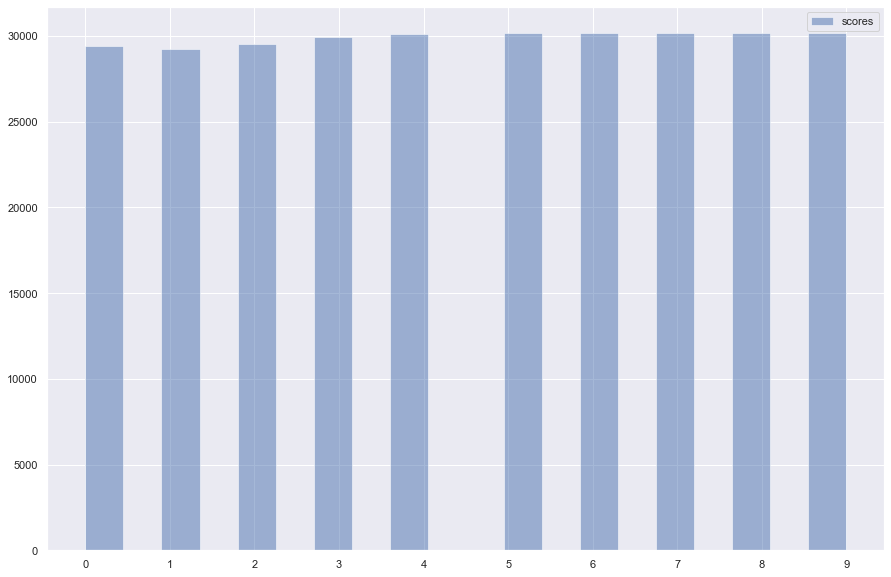

In [112]:
classes = y_train
fig, ax1 = plt.subplots(1, 1, figsize = (15, 10))
ax1.hist(classes, 20, label = 'scores', alpha = 0.5)
ax1.legend()
plt.xticks([0,1,2,3,4,5,6,7,8,9], ["0","1","2","3","4","5","6","7","8","9"])

As you can see each class (which I constured for clap counts) now have same number of elements. I know from my preliminary descriptive analytics in our initial data most of the articles got claps between 0-20.

## SMOGN instead of SMOTE

SMOTE method increases my number of entries 7 times. (300000 entries) This means a lot of synthetic (by SMOTE created) entries in my data frame. To solve this problem I searched for alternative solutions to imbalanced learning problem. I encountered smogn approach as a preprocessing approach. [8] It uses both oversampling and undersampling and after using smogn my number of entries stayed around the same level (42527 entries). Also while using smogn we don't have to create classes as opposed to SMOTE.  However, when I used smogn it took my laptop 19 hours to go through whole training data and I believe this damages replicability of my code. Hence, I used data frame I got using SMOTE to feed into my models.

In [71]:
!pip install smogn
import smogn
from smogn.phi import phi
from smogn.phi_ctrl_pts import phi_ctrl_pts
from smogn.over_sampling import over_sampling

In [72]:
smogndata= pd.concat([train_padded1], axis=1)
smogndata["claps"] = claps

In [68]:
smogn= pd.concat([train_padded1], axis=1)
smogn["claps"] = claps

In [73]:
smogn_balance = smogn.smoter(data= smogndata, y="claps", k=5, rel_thres= 0.80, rel_method="auto", rel_xtrm_type="high", rel_coef= 2.25)

r_index: 100%|##########| 3216/3216 [00:10<00:00, 294.71it/s]


In [74]:
with open('smogn_text.pkl','wb') as file_name:
    pickle.dump(smogn_balance, file_name)

In [75]:
print(smogn_balance["claps"].describe())

count     42527.000000
mean        601.473346
std        3915.832620
min           0.000000
25%           7.000000
50%         197.000000
75%         401.000000
max      291793.000000
Name: claps, dtype: float64


In [77]:
smogn_title = smogn_balance.iloc[:,1:11]
smogn_title = np.array(smogn_title)
print(smogn_title.shape)
smogn_title

(42527, 10)


array([[  184,     0,     0, ...,     0,     0,   155],
       [  173,     0,     0, ...,     0,     0,   162],
       [  563,     0,     0, ...,     0,     0,   169],
       ...,
       [10632,    41,     0, ...,     0,     0,   170],
       [    9,   161,     0, ...,     0,     0,     0],
       [  684,     0,     0, ...,     0,     0,     3]], dtype=int64)

In [ ]:
sg_author_tr = np.matrix(smogn_balance["author"]).transpose()
sg_author_tr.shape

In [85]:
smogn_claps = smogn_balance['claps']
smogn_claps[smogn_claps<0].shape

(0,)

In [86]:
smogn_title[smogn_title<0]=1

In [88]:
smogn_title[smogn_title>90426]=90426

## Embedding

We use a Keras embedding layer  as the first layer so I get a meaningful vector for each word on the same subspace. Here there are several decisions to be made, such as the input length of our layer. As I looked at the length of titles in the descriptive analytics, I noticed most of the titles have word counts less than 10. I chose input_length as 10 because I think that value is optimal to cover most of the titles and keep model size smaller. 

In [22]:
def get_embedding_matrix(tokenizer, pretrain, vocab_size):
    '''
        Helper function to construct an embedding matrix for 
        the focal corpus based on some pre-trained embeddings.
    '''
    
    dim = 0
    if isinstance(pretrain, KeyedVectors) or isinstance(pretrain, Word2VecKeyedVectors):
        dim = pretrain.vector_size        
    elif isinstance(pretrain, dict):
        dim = next(iter(pretrain.values())).shape[0]  # get embedding of an arbitrary word
    else:
        raise Exception('{} is not supported'.format(type(pretrain)))
    

    emb_mat = np.zeros((vocab_size, dim))

    oov_words = []

    for word, i in tokenizer.word_index.items():  
        try:
            emb_mat[i] = pretrain[word]
        except:
            oov_words.append(word)
    print('Created embedding matrix of shape {}'.format(emb_mat.shape))
    print('Encountered {} out-of-vocabulary words.'.format(len(oov_words)))
    return (emb_mat, oov_words)

In [23]:
embed_weights, _ = get_embedding_matrix(tokenizer_obj, wordmodel.wv, 90427)


Created embedding matrix of shape (90427, 100)
Encountered 1399 out-of-vocabulary words.


## LSTM Model based only on title column

I used recurrent neural networks as my first model, which is a class of networks designed to address these problems by processing sequences explicitly as sequences, allowing us to handle variable length inputs without the use of arbitrary fixed-sized windows.[9]. As the activation functions I choose ReLu, since it increases the computation speed when choosen over other alternatives such as tanh. Also ReLu function prevents us from predicting negative values, which is very suitable considering clap value an article gets cannot be below 0. I used LSTM over RNN since it has feedback connections, which helps control the outputs more easily. On the other hand it increases complexity.

In [114]:
x_train_g= x_train.drop(['claps'], axis= 1)
x_train_g

,zero,one,two,three,four,five,six,seven,eight,nine
0,150,581,0,0,0,0,0,0,0,0
1,10982,6,0,0,0,0,0,0,0,0
2,218,100,0,0,0,0,0,0,0,0
3,406,192,0,0,0,0,0,0,0,0
4,70,962,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
299147,269,510,5,0,0,0,0,0,0,0
299148,8124,8885,0,0,0,0,0,0,0,0
299149,395,2056,11,0,0,0,0,0,0,0
299150,1980,78,0,0,0,0,0,0,0,0


In [115]:
x_train_array = np.array(x_train_g)
y_train_g =x_train['claps']
y_train_g

0            128
1              1
2              0
3              1
4             15
           ...  
299147     66882
299148    244926
299149     74535
299150     59347
299151    112556
Name: claps, Length: 299152, dtype: int64

In [96]:
X_test = test['title'].astype(str)
y_test = test['totalClapCount']
y_test
padded_test

array([[   0,    0,    0, ...,  575, 2917,    9],
       [   0,    0,    0, ...,   16, 1796,  822],
       [   0,    0,    0, ...,    0,    4,    5],
       ...,
       [   0,    0,    0, ...,  235,  422,   81],
       [   0,    0,    0, ...,    0,   19,  118],
       [   0,    0,    0, ...,    4, 7004, 9669]])

In [107]:
test_title_padded.shape

(16583, 10)

In [142]:
x_train_g

,zero,one,two,three,four,five,six,seven,eight,nine
0,150,581,0,0,0,0,0,0,0,0
1,10982,6,0,0,0,0,0,0,0,0
2,218,100,0,0,0,0,0,0,0,0
3,406,192,0,0,0,0,0,0,0,0
4,70,962,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
299147,269,510,5,0,0,0,0,0,0,0
299148,8124,8885,0,0,0,0,0,0,0,0
299149,395,2056,11,0,0,0,0,0,0,0
299150,1980,78,0,0,0,0,0,0,0,0


In [106]:
array_sum = np.sum(test_title_padded)
array_has_nan = np.isnan(array_sum)
array_has_nan

False

In [311]:
model = Sequential()
model.add(Embedding(90427, 100, input_length=10, weights=[embed_weights]))
model.add(LSTM(100, dropout=0.5, recurrent_dropout=0.2))
model.add(Dense(1, activation='relu'))
model.compile(loss='mse', optimizer='adam', metrics=['mse'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 10, 100)           9042700   
_________________________________________________________________
lstm_11 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 101       
Total params: 9,123,201
Trainable params: 9,123,201
Non-trainable params: 0
_________________________________________________________________


In [312]:
history=model.fit(x_train_g, y_train_g, validation_data=(test_title_padded ,y_test) , epochs = 10, batch_size=1024)

Epoch 1/10
293/293 [==============================] - 152s 518ms/step - loss: 1718046848.0000 - mse: 1718046848.0000 - val_loss: 2059901.3750 - val_mse: 2059901.3750
Epoch 2/10
293/293 [==============================] - 167s 569ms/step - loss: 1717097344.0000 - mse: 1717097344.0000 - val_loss: 2052675.0000 - val_mse: 2052675.0000
Epoch 3/10
293/293 [==============================] - 156s 532ms/step - loss: 1716221568.0000 - mse: 1716221568.0000 - val_loss: 2047376.8750 - val_mse: 2047376.8750
Epoch 4/10
293/293 [==============================] - 161s 549ms/step - loss: 1715361408.0000 - mse: 1715361408.0000 - val_loss: 2043902.2500 - val_mse: 2043902.2500
Epoch 5/10
293/293 [==============================] - 139s 474ms/step - loss: 1714506368.0000 - mse: 1714506368.0000 - val_loss: 2042188.1250 - val_mse: 2042188.1250
Epoch 6/10
293/293 [==============================] - 150s 510ms/step - loss: 1713656576.0000 - mse: 1713656576.0000 - val_loss: 2042221.0000 - val_mse: 2042221.0000
Epoc

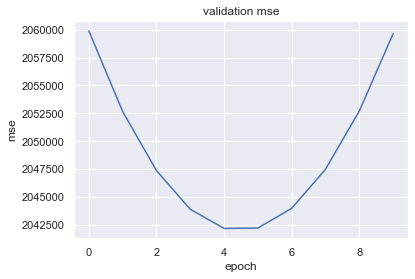

In [314]:
plt.plot(history.history['val_mse'])
plt.title('validation mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.show()

In [315]:
scores={}
test_score = model.evaluate(test_title_padded, y_test, verbose=0)
train_score = model.evaluate(x_train_g, y_train_g, verbose=0)
print('Train loss:', train_score[0])
print('Train MSE:', train_score[1])
print('Test loss (mse):', test_score[0])
print('Test MSE:', test_score[1])


Train loss: 1709863424.0
Train MSE: 1709863424.0
Test loss (mse): 2059644.375
Test MSE: 2059644.375


As you can see I have reached the best validation loss value after 5. epoch. That means increasing the number of epochs I compute will not help me achieve better results. This mse value is also the best I achieve, which is in line with my initial thinking that title is by itself a good enough predictor for clap counts. In terms of simplicity, reading only title column is also the fastest way to construct and run LSTM model.

## Multiple Input Model

Next instead of only using title as a single input, I introduced additionaly author information as a second input. I will construct a multiple input model using Keras functional API, since sequential API as I used above doesn't allow me to have multiple inputs or outputs.[11] Above I have applied SMOTE when I have only title in my data frame. Therefore, I have to apply SMOTE again after including author in my data frame. I can use the same embedding weight matrix because I am going to use the same dictionary. I have used bidirectional LSTM, since it connects two opposite directional hidden layers. This makes our model analyze the text forward and backwards, which improves understanding of the connections between words therefore increase prediction accuracy.

In [280]:
train_padded_mm = pd.DataFrame(data=train_title_padded, columns=['zero','one','two','three','four','five','six','seven','eight','nine'])
train_padded_mm2 = pd.DataFrame(data=train_author_padded, columns=['author'])

In [281]:
train['classes'] = train['totalClapCount'].apply(lambda x: 0 if 0 <= x <= 20 else 1 if 20 < x <= 50 else 2 if 50 < x <= 100 else 3 if 100 < x <= 200 else 4 if 200 < x <= 1000 else 5 if 1000 < x <= 2000 else 6 if 2000 < x <= 5000 else 7 if 5000 < x <= 10000 else 8 if 10000 < x <= 50000 else 9)

C:\Users\osman\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [282]:
train_smote_mm = train['totalClapCount']

In [289]:
train_class_mm = train['classes']

In [290]:
train_smote_mm.reset_index(drop=True, inplace=True)
train_padded_mm.reset_index(drop=True, inplace=True)
train_padded_mm2.reset_index(drop=True, inplace=True)
mm_data = pd.concat([train_smote_mm, train_padded_mm, train_padded_mm2], axis=1)

([<matplotlib.axis.XTick at 0x242c2be38c8>,
 <a list of 10 Text xticklabel objects>)

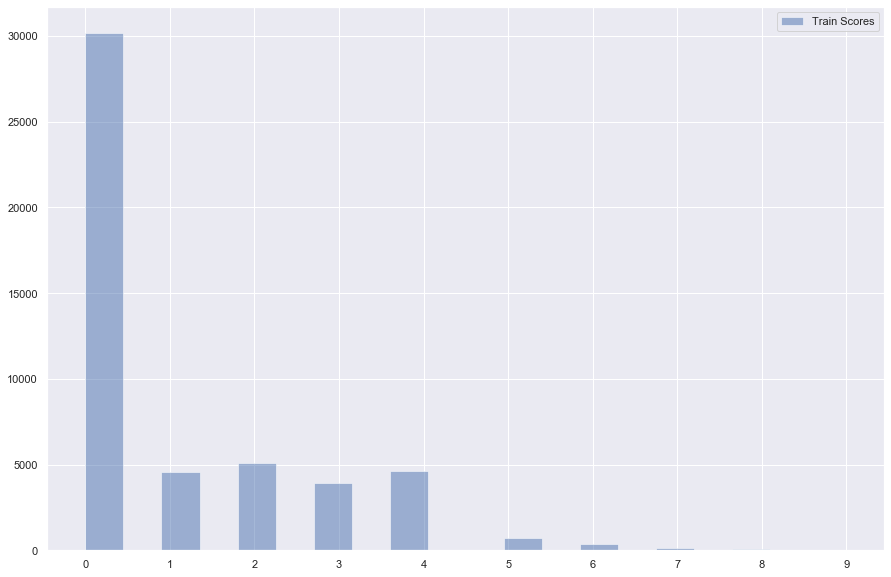

In [291]:
classes = train_class_mm
fig, ax1 = plt.subplots(1, 1, figsize = (15, 10))
ax1.hist(classes, 20, label = 'Train Scores', alpha = 0.5)
ax1.legend()
plt.xticks([0,1,2,3,4,5,6,7,8,9], ["0","1","2","3","4","5","6","7","8","9"])

In [348]:
sm = SMOTE(random_state=54)
x_train_mm, y_train_mm = sm.fit_sample(mm_data, train_class_mm)
mm_in= x_train_mm.drop(['totalClapCount', 'author'], axis= 1)
mm_out =x_train_mm['totalClapCount']
mm_in2 = x_train_mm['author']

In [325]:
embed_weights

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.32723904, -0.57694399, -3.92547035, ..., -0.4438138 ,
         0.90359616,  1.55325687],
       [ 2.39518332, -0.50735325,  1.10653234, ..., -3.76678705,
        -1.68567061,  0.58407223],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [345]:
max_features = 2000
maxlen = 10
emb = 100
no_words = 90427

mm_title = Input(shape=(maxlen,), name="title")
mm_auth = Input(shape=(1,), name="author")
mm_conc = concatenate([mm_title, mm_auth])
embedding_layer = Embedding(output_dim=emb, input_dim=no_words, input_length=maxlen, weights=[embed_weights])(mm_title)
lstm2 = Bidirectional(LSTM(emb, dropout=0.05, recurrent_dropout=0.1 ))(embedding_layer)
mm_conc = concatenate([mm_title, mm_auth, lstm2])
res = Dense(50,activation='relu')(mm_conc)
res = Dense(1,activation='relu')(res)

multimodel = Model(inputs=[mm_title, mm_auth], outputs=[res])

multimodel.summary()

Model: "functional_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
title (InputLayer)              [(None, 10)]         0                                            
__________________________________________________________________________________________________
embedding_35 (Embedding)        (None, 10, 100)      9042700     title[0][0]                      
__________________________________________________________________________________________________
author (InputLayer)             [(None, 1)]          0                                            
__________________________________________________________________________________________________
bidirectional_22 (Bidirectional (None, 200)          160800      embedding_35[0][0]               
_______________________________________________________________________________________

In [349]:
mm_in

,zero,one,two,three,four,five,six,seven,eight,nine
0,1,3,1319,3203,0,0,0,0,0,0
1,3468,3467,257,2635,1288,26,199,0,0,0
2,25,1463,1614,0,0,0,0,0,0,0
3,148,1959,9879,4845,0,0,0,0,0,0
4,298,2235,56,1253,9880,131,2050,0,0,0
...,...,...,...,...,...,...,...,...,...,...
301925,3938,24,0,0,0,0,0,0,0,0
301926,7460,3071,431,1097,3278,79,6802,6802,238,0
301927,3774,99,25,13,116,9,190,0,0,0
301928,934,2,2,0,0,0,0,0,0,0


In [351]:
multimodel.compile(loss='mse',
                  optimizer=keras.optimizers.Adam(lr=0.001),
                  metrics=['mean_squared_error'])

early = EarlyStopping(monitor="val_loss", mode="min", patience=5)

multihistory = multimodel.fit([mm_in, mm_in2], mm_out, validation_data= ([test_title_padded, test_author_padded], y_test), batch_size=256, epochs=10, callbacks=[early])

Epoch 1/10
1180/1180 [==============================] - 741s 628ms/step - loss: 955255872.0000 - mean_squared_error: 955255872.0000 - val_loss: 174804112.0000 - val_mean_squared_error: 174804112.0000
Epoch 2/10
1180/1180 [==============================] - 597s 506ms/step - loss: 753044032.0000 - mean_squared_error: 753044032.0000 - val_loss: 171442816.0000 - val_mean_squared_error: 171442816.0000
Epoch 3/10
1180/1180 [==============================] - 483s 410ms/step - loss: 655715008.0000 - mean_squared_error: 655715008.0000 - val_loss: 118457016.0000 - val_mean_squared_error: 118457016.0000
Epoch 4/10
1180/1180 [==============================] - 493s 418ms/step - loss: 563091520.0000 - mean_squared_error: 563091520.0000 - val_loss: 96644928.0000 - val_mean_squared_error: 96644928.0000
Epoch 5/10
1180/1180 [==============================] - 530s 449ms/step - loss: 471627200.0000 - mean_squared_error: 471627200.0000 - val_loss: 82592152.0000 - val_mean_squared_error: 82592152.0000
Epoc

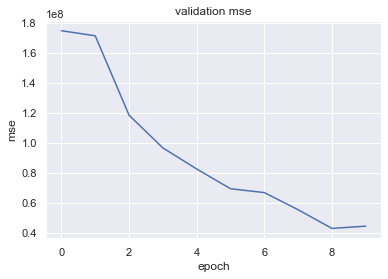

In [364]:
plt.plot(multihistory.history['val_mean_squared_error'])
plt.title('validation mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.show()

As you can see after 10. epoch validation mean squared error goes up, so I won't increase the number of epochs. Also the loss values I get are quite higher than the ones I get using only title column, execution time is way higher as well. Hence, I choose not to use the multiple input model.

## Model based only on author as a benchmark

As a benchmark I predict clap counts only based on the author. I applied SMOTE again this time only using author column. Afterwards I used the same model from the first LSTM model I constructed using only title column.

In [165]:
train_padded2 = pd.DataFrame(data=train_author_padded, columns=['authors'])

In [161]:
data_smote = train[['totalClapCount']]

In [162]:
train['classes'] = train['totalClapCount'].apply(lambda x: 0 if 0 <= x <= 10 else 1 if 10 < x <= 50 else 2 if 50 < x <= 100 else 3 if 100 < x <= 200 else 4 if 200 < x <= 1000 else 5 if 1000 < x <= 2000 else 6 if 2000 < x <= 5000 else 7 if 5000 < x <= 10000 else 8 if 10000 < x <= 50000 else 9)

C:\Users\osman\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [174]:
data_smote.reset_index(drop=True, inplace=True)
train_padded2.reset_index(drop=True, inplace=True)

In [175]:
df = pd.concat([data_smote, train_padded2], axis=1)

In [176]:
y_classes = train['classes']

In [177]:
sm = SMOTE(random_state=4)
x_train_aut, y_train_aut = sm.fit_sample(df, y_classes)

In [223]:
x_train_aut

,totalClapCount,authors
0,128,130
1,1,7624
2,0,534
3,1,65
4,15,209
...,...,...
271615,92448,15808
271616,231045,8457
271617,119062,7088
271618,261723,4640


In [218]:
y_train_aut.shape

(271620,)

In [274]:
x_train_author=x_train_aut.drop(['totalClapCount'], axis= 1)
y_train_author =x_train_aut['totalClapCount']

In [275]:
model_auth = Sequential()
model_auth.add(Embedding(90427, 100, input_length=10, weights=[embed_weights]))
model_auth.add(LSTM(100, dropout=0.5, recurrent_dropout=0.2))
model_auth.add(Dense(1, activation='relu'))
model_auth.compile(loss='mse', optimizer='adam', metrics=['mse'])
model_auth.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 10, 100)           9042700   
_________________________________________________________________
lstm_7 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 101       
Total params: 9,123,201
Trainable params: 9,123,201
Non-trainable params: 0
_________________________________________________________________


In [276]:
history2 =model_auth.fit(x_train_author, y_train_author, validation_data=(test_author_padded ,y_test) , epochs = 10, batch_size=1024)

Epoch 1/10
266/266 [==============================] - 48s 181ms/step - loss: 1709682176.0000 - mse: 1709682176.0000 - val_loss: 2068054.1250 - val_mse: 2068054.1250
Epoch 2/10
266/266 [==============================] - 66s 247ms/step - loss: 1709014784.0000 - mse: 1709014784.0000 - val_loss: 2062493.2500 - val_mse: 2062493.2500
Epoch 3/10
266/266 [==============================] - 57s 214ms/step - loss: 1708399744.0000 - mse: 1708399744.0000 - val_loss: 2057079.0000 - val_mse: 2057079.0000
Epoch 4/10
266/266 [==============================] - 53s 198ms/step - loss: 1707772160.0000 - mse: 1707772160.0000 - val_loss: 2052047.3750 - val_mse: 2052047.3750
Epoch 5/10
266/266 [==============================] - 53s 200ms/step - loss: 1707128320.0000 - mse: 1707128320.0000 - val_loss: 2047930.7500 - val_mse: 2047930.7500
Epoch 6/10
266/266 [==============================] - 58s 216ms/step - loss: 1706453760.0000 - mse: 1706453760.0000 - val_loss: 2044598.3750 - val_mse: 2044598.3750
Epoch 7/10

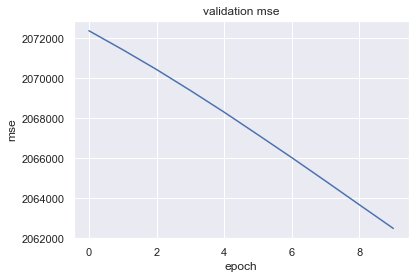

In [183]:
plt.plot(history2.history['val_mse'])
plt.title('validation mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.show()

As you can see validation loss keeps going down so there is room for improvement, but as I use this model only as a benchmark 10 epochs is enough.

In [185]:
scores={}
test_score = model_auth.evaluate(test_author_padded, y_test, verbose=0)
train_score = model_auth.evaluate(x_train_g, y_train_g, verbose=0)
print('Train loss:', train_score[0])
print('Train MSE:', train_score[1])
print('Test loss (mse):', test_score[0])
print('Test MSE:', test_score[1])


Train loss: 1709957248.0
Train MSE: 1709957248.0
Test loss (mse): 2062491.75
Test MSE: 2062491.75


## Predictions

I have read the test data and changed 'Header' column into 'title' above. Now I have to apply the same tokenization and padding steps, that I used for training data, for author and title columns of unknown data before making predictions with my selected model. (I chose title only model so tokenizing only title column of unknown data would be sufficient)

In [205]:
testdata.head(5)

,Unnamed: 0,index,Author,PublicationDetails,Responses,title,Text,wordCount
0,0,0,Daniel Jeffries,"Daniel Jeffries in HackerNoon.comJul 31, 2017",627 responses,Why Everyone Missed the Most Mind-Blowing Feat...,There’s one incredible feature of cryptocurren...,23401
1,1,1,Noam Levenson,"Noam Levenson in HackerNoon.comDec 6, 2017",156 responses,NEO versus Ethereum: Why NEO might be 2018’s s...,"<img class=""progressiveMedia-noscript js-progr...",23972
2,2,2,Daniel Jeffries,"Daniel Jeffries in HackerNoon.comJul 21, 2017",176 responses,The Cryptocurrency Trading Bible,So you want to trade cryptocurrency?You’ve see...,402
3,3,5,Haseeb Qureshi,"Haseeb Qureshi in HackerNoon.comFeb 19, 2018",72 responses,Stablecoins: designing a price-stable cryptocu...,A useful currency should be a medium of exchan...,19730
4,4,7,William Belk,"William Belk in HackerNoon.comJan 28, 2018",19 responses,Chaos vs. Order — The Cryptocurrency Dilemma,Crypto crypto crypto crypto. It’s here. It’s h...,5324


In [208]:
testdata['author']= testdata['author'].astype(str)
testdata['author']= testdata['author'].map(lambda x: clean_authors(x))

In [209]:
testdata['title']= testdata['title'].astype(str)
testdata['title']= testdata['title'].map(lambda x: clean_title(x))

In [210]:
vocab_size = 90427
tokenizer_obj = Tokenizer(num_words= vocab_size)
tokenizer_obj.fit_on_texts(testdata['title'])
tokenized_title = tokenizer_obj.texts_to_sequences(testdata['title'])

padded_testing = pad_sequences(tokenized_title,10)

test_title = np.flip(padded_testing, axis=1)

In [211]:
vocab_size = 90427
tokenizer_obj = Tokenizer(num_words= vocab_size)

tokenizer_obj.fit_on_texts(testdata['author'])
tokenized_auth = tokenizer_obj.texts_to_sequences(testdata['author'])

padded_test1 = pad_sequences(tokenized_auth,1)

test_auth = np.flip(padded_test1, axis=1)

In [214]:
testdata.shape

(514, 8)

In [ ]:
prediction = model.predict([test_title, test_auth])
df = pd.DataFrame(data=prediction.flatten(), columns=['PredictedClaps'], index=testdata['index'])

In [278]:
predictions= pd.DataFrame({'Claps':df['Claps']})

In [279]:
predictions.to_csv('clap_predictions.csv')

## References

[1] Strakova, J. & Straka, M. & Hajic, J. (2014) Open-Source Tools for Morphology, Lemmatization, POS Tagging and Named Entity Recognition, Association for Computational Linguistics

[2] Wielgosz, M. (2014) Implementation of a System for Fast Text Search and Document Comparison, Part of the Studies in Computational Intelligence book series (SCI, volume 541)

[3] Srinivasa-Deikan, B. (2018) Natural Language Processing and Computational Linguistics: A practical guide

[4] Fasnacht, L. (2018) mmappickle: Python 3 module to store memory-mapped numpy array in pickle format, Journal of Open Source Software, 3(26), 65

[5] Zhang, A. & Lipton, C. & Li, M. & Smola, A. (2019) Dive into Deep Learning: Chapter 14.3.1

[6] Webster, J. & Kit, C. (1992) Tokenization as the initial phase in nl, ActES DE COLING-92, Nantes:.S, 23-28

[7] Keshi, I. & Suzuki Y., & Yoshino, K. & Nakamura, S. (2018) Semantically Readable Distributed Representation Learning and Its Expandability Using a Word Semantic Vector Dictionary, IEICE TRANSACTIONS on Information and Systems   Vol.E101-D   No.4   pp.1066-1078 

[8] Branco, P. & Torgo, L. & Ribeiro R. (2017) SMOGN: a Pre-processing Approach for Imbalanced Regression, Proceedings of the First International Workshop on Learning with Imbalanced Domains: Theory and Applications, PMLR 74:36-50

[9] Jurafsky, D. (2000) Speech & language processing, Pearson Education India

[10] Fernández, A. & Garcia, S.& Herrera, F., & Chawla, N. V. (2018) SMOTE for learning from imbalanced data: progress and challenges, marking the 15-year anniversary. Journal of artificial intelligence research, 61

[11] Manaswi, N. K. (2018) Understanding and Working with Keras, Deep Learning with Applications Using Python pp 31-43